# Customer Segmentation_Portfolio Project

Customer Segmentation_Portfolio Project

This customer segmentation project aims to identify special customers who actively interact with the business and avoid remaining passive for extended periods. The analysis focuses on customers who contribute income to the business by excluding negative quantities and prices, which represent cancellations.

To ensure data accuracy, unknown descriptions were excluded from the analysis after determining their percentage within the dataset. SQL queries and Python codes were employed to analyze the data and address specific questions related to the dataset.

The RFM (Recency, Frequency, Monetary) method will be utilized for customer segmentation. This approach considers the recency of customer purchases, the frequency of their interactions, and the monetary value of their transactions.

This project was conducted during the WAIA bootcamp, which is an opportunity to apply learning in data analysis and customer segmentation.

The data for this project was extracted from Redshift, a data warehousing service, ensuring a robust and comprehensive dataset for the analysis.

- Part 1. Query the data in jupyter notebook
- Part 2. SQL Analysis
- Part 3. Use Python to Analyze and Visualize the Data
- Part 4. RFM analysis
- Part 5. Load Data locally
- Part 6. Conclusions and Results

# Importing Libraries 

In [1]:
import pandas as pd
import psycopg2
import numpy as np
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# Part 1. Query the data in jupyter notebook

In [2]:
from dotenv import load_dotenv
load_dotenv()
import os

# import variables from .env file
dbname = os.getenv("dbname")
host = os.getenv("host")
port = os.getenv("port")
user = os.getenv("user")
password = os.getenv("password")
aws_access_key_id = os.getenv("aws_access_key_id")
aws_secret_access_key_id = os.getenv("aws_secret_access_key_id")


In [3]:
connect=psycopg2.connect(dbname=dbname, host=host, port=port, user=user, password=password)
cursor=connect.cursor()

In [4]:
query = """
select * 
from bootcamp.online_transactions_cleaned 
limit(10)
"""
df=pd.read_sql(query, connect)
df

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country
0,536384,22189,CREAM HEART CARD HOLDER,3.95,4,15.80,2010-12-01 09:53:00,u18074,United Kingdom
1,536392,21891,TRADITIONAL WOODEN SKIPPING ROPE,1.25,12,15.00,2010-12-01 10:29:00,u13705,United Kingdom
2,536401,22068,BLACK PIRATE TREASURE CHEST,1.65,2,3.30,2010-12-01 11:21:00,u15862,United Kingdom
3,536412,22961,JAM MAKING SET PRINTED,1.45,24,34.80,2010-12-01 11:49:00,u1792,United Kingdom
4,536420,21889,WOODEN BOX OF DOMINOES,1.25,12,15.00,2010-12-01 12:03:00,u16583,United Kingdom
5,536464,22742,MAKE YOUR OWN PLAYTIME CARD KIT,2.95,1,2.95,2010-12-01 12:23:00,u17968,United Kingdom
6,536520,22557,PLASTERS IN TIN VINTAGE PAISLEY,1.65,2,3.30,2010-12-01 12:43:00,u14729,United Kingdom
7,536525,20973,12 PENCIL SMALL TUBE WOODLAND,0.65,2,1.30,2010-12-01 12:54:00,u14078,United Kingdom
8,536378,84519A,TOMATO CHARLIE+LOLA COASTER SET,2.95,6,17.70,2010-12-01 09:37:00,u14688,United Kingdom
9,536401,22100,SKULLS SQUARE TISSUE BOX,1.25,2,2.50,2010-12-01 11:21:00,u15862,United Kingdom


In [5]:
query = """
select * 
from bootcamp.online_transactions_cleaned 
"""
ot_cleaned= pd.read_sql(query, connect)
ot_cleaned 

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country
0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,1.25,24,30.00,2010-12-01 08:45:00,u12583,France
1,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,19.95,1,19.95,2010-12-01 09:56:00,u1742,United Kingdom
2,536392,22128,PARTY CONES CANDY ASSORTED,1.25,12,15.00,2010-12-01 10:29:00,u13705,United Kingdom
3,536404,22469,HEART OF WICKER SMALL,1.65,12,19.80,2010-12-01 11:29:00,u16218,United Kingdom
4,536412,22274,FELTCRAFT DOLL EMILY,2.95,2,5.90,2010-12-01 11:49:00,u1792,United Kingdom
...,...,...,...,...,...,...,...,...,...
399836,581476,22998,TRAVEL CARD WALLET KEEP CALM,0.42,72,30.24,2011-12-09 08:48:00,u12433,Norway
399837,581478,23126,DOLLCRAFT GIRL AMELIE,4.95,4,19.80,2011-12-09 08:59:00,u17364,United Kingdom
399838,581493,79190B,RETRO PLASTIC POLKA TRAY,0.42,15,6.30,2011-12-09 10:10:00,u12423,Belgium
399839,581501,22807,SET OF 6 T-LIGHTS TOADSTOOLS,1.25,12,15.00,2011-12-09 10:46:00,u12985,United Kingdom


# Part 2. SQL Analysis

In [6]:
###What are the top ten most popular geographical locations of customers?
query = """ SELECT country, COUNT(*) AS Count
FROM bootcamp.online_transactions_cleaned otc 
GROUP BY country 
ORDER BY Count DESC
LIMIT 10;
"""
top_countries=pd.read_sql(query, connect)
top_countries

,country,count
0,United Kingdom,356158
1,Germany,9081
2,France,8154
3,EIRE,7469
4,Spain,2463
5,Netherlands,2330
6,Belgium,1971
7,Switzerland,1844
8,Portugal,1427
9,Australia,1256


In [7]:
####What are the number of invoices per month? 
query = """
    select
        cast(date_part(year, cast(invoice_date as Datetime)) as int) as invoice_year,
        cast(date_part(month, cast(invoice_date as Datetime)) as int) as invoice_month,
        count(distinct invoice) as number_invoices
    from bootcamp.online_transactions_cleaned otc
    group by invoice_year, invoice_month
    order by invoice_year, invoice_month
        """

monthly_invoice=pd.read_sql(query, connect)
monthly_invoice

,invoice_year,invoice_month,number_invoices
0,2010,12,1692
1,2011,1,1225
2,2011,2,1181
3,2011,3,1588
4,2011,4,1358
5,2011,5,1808
6,2011,6,1686
7,2011,7,1555
8,2011,8,1506
9,2011,9,2038


In [8]:
###-	How many invoices does the table contain?
query="""select count(distinct invoice) AS total_invoice
from bootcamp.online_transactions_cleaned otc
"""
pd.read_sql(query, connect)

,total_invoice
0,21791


In [9]:
##-	When was the first and last purchase?
query=""" select max(invoice_date) AS last_puchase, min(invoice_date) AS first_purchase
from bootcamp.online_transactions_cleaned otc
"""
pd.read_sql(query, connect)

,last_puchase,first_purchase
0,2011-12-09 12:50:00,2010-12-01 08:26:00


In [10]:
####-	How many customers does the table contain?
query="""select count(distinct customer_id) AS total_customer 
from bootcamp.online_transactions_cleaned otc
"""
pd.read_sql(query, connect)

,total_customer
0,4363


In [11]:
###How many different types of stocks did the customer purchase?


query="""select count(Distinct stock_code) AS types_stocks_purchased
from bootcamp.online_transactions_cleaned otc
"""
pd.read_sql(query, connect)

,types_stocks_purchased
0,3679


In [12]:
query = """
SELECT stock_code, SUM(quantity) AS most_popular_stock, description
FROM bootcamp.online_transactions_cleaned otc
GROUP BY stock_code, description
ORDER BY most_popular_stock DESC
LIMIT 10
"""
pd.read_sql(query, connect)

,stock_code,most_popular_stock,description
0,84077,53119,WORLD WAR 2 GLIDERS ASSTD DESIGNS
1,22197,48689,POPCORN HOLDER
2,85099B,44963,JUMBO BAG RED RETROSPOT
3,84879,35215,ASSORTED COLOUR BIRD ORNAMENT
4,85123A,34185,CREAM HANGING HEART T-LIGHT HOLDER
5,21212,33386,PACK OF 72 RETROSPOT CAKE CASES
6,23084,27045,RABBIT NIGHT LIGHT
7,22492,25880,MINI PAINT SET VINTAGE
8,22616,25305,PACK OF 12 LONDON TISSUES
9,21977,24129,PACK OF 60 PINK PAISLEY CAKE CASES


In [13]:
###-	What is the average order value i.e. price * quantity?
query=""" select(price*quantity) AS average
from bootcamp.online_transactions_cleaned otc

"""
pd.read_sql(query, connect)

,average
0,15.80
1,15.00
2,3.30
3,34.80
4,15.00
...,...
399836,17.00
399837,15.00
399838,10.20
399839,15.00


In [14]:
##-	How many Stocks have the Description “Unknown”? How will you handle this when building customer segments?

query=""" select count(stock_code)
from bootcamp.online_transactions_cleaned otc
where description ='Unknown'
"""
pd.read_sql(query, connect)


##For this analysis i will   Exclude "Unknown" stocks in python part 

,count
0,1172


# Part 3. Use Python to Analyze and Visualize the Data

In [15]:
ot_cleaned

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country
0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,1.25,24,30.00,2010-12-01 08:45:00,u12583,France
1,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,19.95,1,19.95,2010-12-01 09:56:00,u1742,United Kingdom
2,536392,22128,PARTY CONES CANDY ASSORTED,1.25,12,15.00,2010-12-01 10:29:00,u13705,United Kingdom
3,536404,22469,HEART OF WICKER SMALL,1.65,12,19.80,2010-12-01 11:29:00,u16218,United Kingdom
4,536412,22274,FELTCRAFT DOLL EMILY,2.95,2,5.90,2010-12-01 11:49:00,u1792,United Kingdom
...,...,...,...,...,...,...,...,...,...
399836,581476,22998,TRAVEL CARD WALLET KEEP CALM,0.42,72,30.24,2011-12-09 08:48:00,u12433,Norway
399837,581478,23126,DOLLCRAFT GIRL AMELIE,4.95,4,19.80,2011-12-09 08:59:00,u17364,United Kingdom
399838,581493,79190B,RETRO PLASTIC POLKA TRAY,0.42,15,6.30,2011-12-09 10:10:00,u12423,Belgium
399839,581501,22807,SET OF 6 T-LIGHTS TOADSTOOLS,1.25,12,15.00,2011-12-09 10:46:00,u12985,United Kingdom


In [16]:
ot_cleaned.columns

Index(['invoice', 'stock_code', 'description', 'price', 'quantity',
       'total_order_value', 'invoice_date', 'customer_id', 'country'],
      dtype='object')

In [17]:
ot_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399841 entries, 0 to 399840
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   invoice            399841 non-null  object        
 1   stock_code         399841 non-null  object        
 2   description        399841 non-null  object        
 3   price              399841 non-null  float64       
 4   quantity           399841 non-null  int64         
 5   total_order_value  399841 non-null  float64       
 6   invoice_date       399841 non-null  datetime64[ns]
 7   customer_id        399841 non-null  object        
 8   country            399841 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 27.5+ MB


In [18]:
ot_cleaned.describe().round(3)

,price,quantity,total_order_value,invoice_date
count,399841.000,399841.000,399841.000,399841
mean,2.953,12.224,20.717,2011-07-10 12:40:36.644566016
min,0.000,-80995.000,-168469.600,2010-12-01 08:26:00
25%,1.250,2.000,4.250,2011-04-06 15:31:00
50%,1.950,5.000,11.580,2011-07-29 15:59:00
75%,3.750,12.000,19.500,2011-10-20 12:03:00
max,1599.260,80995.000,168469.600,2011-12-09 12:50:00
std,7.318,250.789,425.472,NaN


In [19]:
unknown_stocks = ot_cleaned[ot_cleaned['description'] == 'Unknown']
unknown_stock_count = len(unknown_stocks)
print(f"The number of unknown stocks: {unknown_stock_count}")

The number of unknown stocks: 1172


In [20]:
unknown_stocks.head()

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country
761,537627,21704,Unknown,0.72,72,51.84,2010-12-07 14:58:00,u14739,United Kingdom
1307,538204,21704,Unknown,0.72,216,155.52,2010-12-10 11:23:00,u16656,United Kingdom
1854,536597,21703,Unknown,0.42,4,1.68,2010-12-01 17:35:00,u18011,United Kingdom
1911,536557,46000R,Unknown,1.45,2,2.90,2010-12-01 14:41:00,u17841,United Kingdom
1972,537023,22686,Unknown,1.25,1,1.25,2010-12-03 16:02:00,u16725,United Kingdom


In [21]:
final_ot=ot_cleaned.drop(ot_cleaned[ot_cleaned['description'] == 'Unknown'].index)
final_ot

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country
0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,1.25,24,30.00,2010-12-01 08:45:00,u12583,France
1,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,19.95,1,19.95,2010-12-01 09:56:00,u1742,United Kingdom
2,536392,22128,PARTY CONES CANDY ASSORTED,1.25,12,15.00,2010-12-01 10:29:00,u13705,United Kingdom
3,536404,22469,HEART OF WICKER SMALL,1.65,12,19.80,2010-12-01 11:29:00,u16218,United Kingdom
4,536412,22274,FELTCRAFT DOLL EMILY,2.95,2,5.90,2010-12-01 11:49:00,u1792,United Kingdom
...,...,...,...,...,...,...,...,...,...
399836,581476,22998,TRAVEL CARD WALLET KEEP CALM,0.42,72,30.24,2011-12-09 08:48:00,u12433,Norway
399837,581478,23126,DOLLCRAFT GIRL AMELIE,4.95,4,19.80,2011-12-09 08:59:00,u17364,United Kingdom
399838,581493,79190B,RETRO PLASTIC POLKA TRAY,0.42,15,6.30,2011-12-09 10:10:00,u12423,Belgium
399839,581501,22807,SET OF 6 T-LIGHTS TOADSTOOLS,1.25,12,15.00,2011-12-09 10:46:00,u12985,United Kingdom


In [22]:
final_ot.shape

(398669, 9)

In [23]:
ot_cleaned.shape

(399841, 9)

In [24]:
final_ot.groupby('description').agg({'quantity':'sum'}).sort_values('quantity', ascending=False)

,quantity
description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119
POPCORN HOLDER,48689
JUMBO BAG RED RETROSPOT,44963
ASSORTED COLOUR BIRD ORNAMENT,35215
CREAM HANGING HEART T-LIGHT HOLDER,34185
...,...
WHITE CHERRY LIGHTS,-8
ROBIN CHRISTMAS CARD,-9
PINK POODLE HANGING DECORATION,-12


In [25]:
###1-What are the top ten most popular geographical locations?
location_counts = final_ot['country'].value_counts().head(10)
location_counts

country
United Kingdom    355052
Germany             9074
France              8138
EIRE                7453
Spain               2459
Netherlands         2330
Belgium             1965
Switzerland         1842
Portugal            1427
Australia           1256
Name: count, dtype: int64

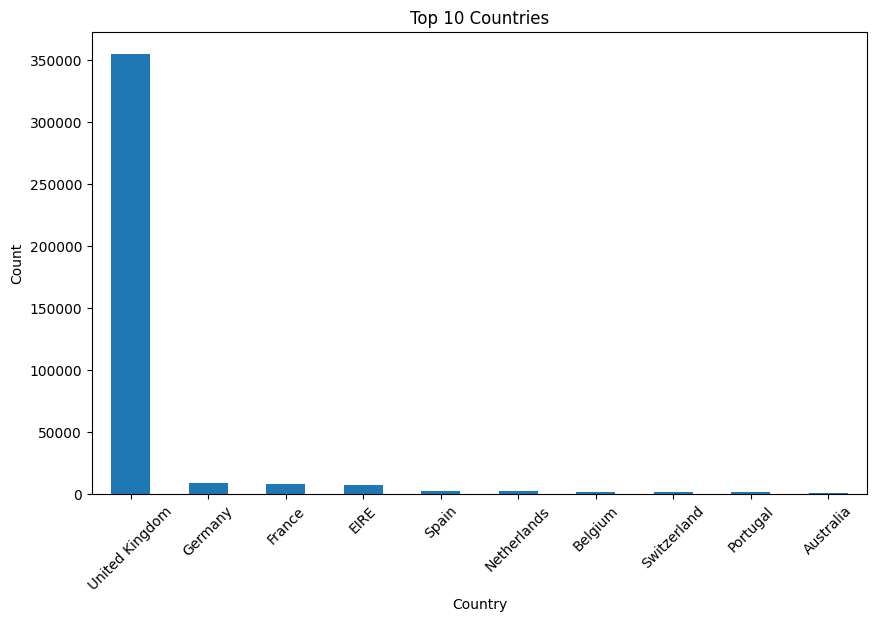

In [26]:
# Plotting the bar chart
top_countries = location_counts.head(10)

# Plotting the bar chart using pandas
plt.figure(figsize=(10, 6))
top_countries.plot.bar()
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries')
plt.xticks(rotation=45)
plt.show()

In [27]:
##before removing 
ot_cleaned['country'].value_counts().head(10)

country
United Kingdom    356158
Germany             9081
France              8154
EIRE                7469
Spain               2463
Netherlands         2330
Belgium             1971
Switzerland         1844
Portugal            1427
Australia           1256
Name: count, dtype: int64

In [28]:
##2-Which country spends the most (you can look at price, quantity or order value i.e. price * quantity)?
###adding a new column
final_ot['order_value']=ot_cleaned['quantity']*ot_cleaned['price']
final_ot

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,order_value
0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,1.25,24,30.00,2010-12-01 08:45:00,u12583,France,30.00
1,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,19.95,1,19.95,2010-12-01 09:56:00,u1742,United Kingdom,19.95
2,536392,22128,PARTY CONES CANDY ASSORTED,1.25,12,15.00,2010-12-01 10:29:00,u13705,United Kingdom,15.00
3,536404,22469,HEART OF WICKER SMALL,1.65,12,19.80,2010-12-01 11:29:00,u16218,United Kingdom,19.80
4,536412,22274,FELTCRAFT DOLL EMILY,2.95,2,5.90,2010-12-01 11:49:00,u1792,United Kingdom,5.90
...,...,...,...,...,...,...,...,...,...,...
399836,581476,22998,TRAVEL CARD WALLET KEEP CALM,0.42,72,30.24,2011-12-09 08:48:00,u12433,Norway,30.24
399837,581478,23126,DOLLCRAFT GIRL AMELIE,4.95,4,19.80,2011-12-09 08:59:00,u17364,United Kingdom,19.80
399838,581493,79190B,RETRO PLASTIC POLKA TRAY,0.42,15,6.30,2011-12-09 10:10:00,u12423,Belgium,6.30
399839,581501,22807,SET OF 6 T-LIGHTS TOADSTOOLS,1.25,12,15.00,2011-12-09 10:46:00,u12985,United Kingdom,15.00


In [29]:
spend_most=final_ot.sort_values('order_value', ascending=False)
spend_most

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,order_value
398596,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",2.08,80995,168469.60,2011-12-09 09:15:00,u16446,United Kingdom,168469.60
113872,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,1.04,74215,77183.60,2011-01-18 10:01:00,u12346,United Kingdom,77183.60
201213,556444,22502,PICNIC BASKET WICKER SMALL,649.50,60,38970.00,2011-06-10 15:28:00,u15098,United Kingdom,38970.00
146994,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,5.06,1412,7144.72,2011-09-20 11:05:00,u1745,United Kingdom,7144.72
104747,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,2.10,3114,6539.40,2011-01-11 12:55:00,u15749,United Kingdom,6539.40
...,...,...,...,...,...,...,...,...,...,...
65523,C550456,48185,DOORMAT FAIRY CAKE,6.75,-670,-4522.50,2011-04-18 13:08:00,u15749,United Kingdom,-4522.50
89056,C550456,85123A,CREAM HANGING HEART T-LIGHT HOLDER,2.55,-1930,-4921.50,2011-04-18 13:08:00,u15749,United Kingdom,-4921.50
68695,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,2.10,-3114,-6539.40,2011-04-18 13:08:00,u15749,United Kingdom,-6539.40
111623,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,1.04,-74215,-77183.60,2011-01-18 10:17:00,u12346,United Kingdom,-77183.60


In [30]:
spending_by_country = spend_most.groupby('country')['order_value'].sum().sort_values(ascending=False)
spending_by_country 

country
United Kingdom          6800607.993
Netherlands              283479.540
EIRE                     251368.770
Germany                  200551.740
France                   181444.950
Australia                136922.500
Switzerland               51843.480
Spain                     51721.570
Belgium                   36611.020
Japan                     35419.790
Sweden                    35044.010
Norway                    32258.360
Portugal                  26500.260
Channel Islands           20076.390
Finland                   18303.540
Denmark                   18042.140
Italy                     15266.260
Cyprus                    12843.760
Singapore                  9100.230
Austria                    8688.120
Israel                     6988.400
Poland                     6838.140
Greece                     4425.520
Iceland                    4310.000
Canada                     3110.400
Unspecified                2571.730
Malta                      1980.470
United Arab Emirates

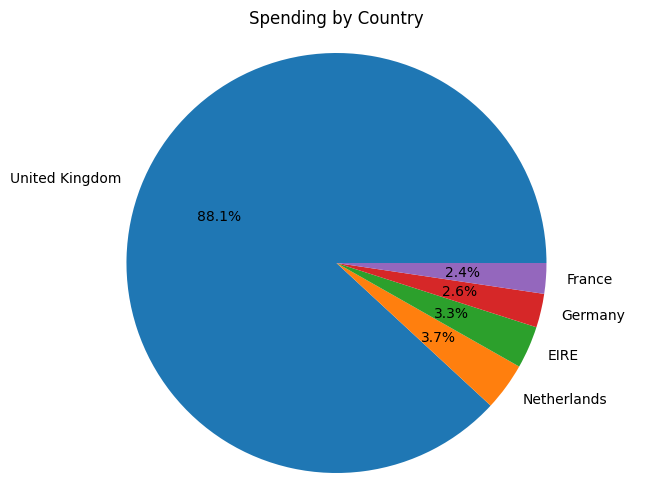

In [31]:

# Calculate spending by country
spending_by_country = spend_most.groupby('country')['order_value'].sum().sort_values(ascending=False).head()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(spending_by_country, labels=spending_by_country.index, autopct='%1.1f%%')
plt.title('Spending by Country')
plt.axis('equal')
plt.show()

In [32]:
##3.	You could look at seasonality
#a.a.	Visualize the distribution of Invoices per month?
#b.	Which month has the highest number of transactions?
#c.	Which day of the week has the highest number of transactions?

#Make sure you are filtering by year!!! Does this help with segmenting the customers?

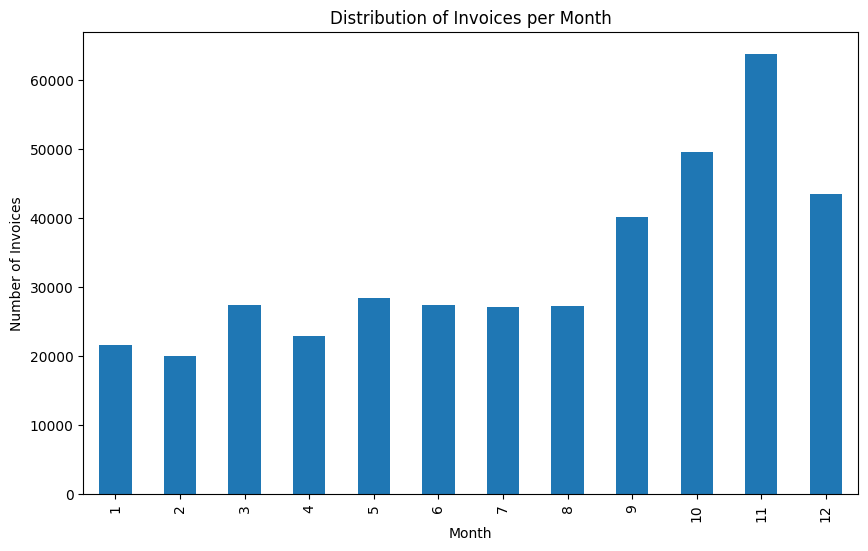

In [33]:


final_ot['invoice_date'] = pd.to_datetime(final_ot['invoice_date'])

# Extract the month from the 'invoice_date' column
final_ot['Month'] = final_ot['invoice_date'].dt.month

# Count the number of invoices per month
invoices_per_month = final_ot.groupby('Month')['invoice'].count()

# Plotting the distribution of invoices per month
plt.figure(figsize=(10, 6))
invoices_per_month.plot.bar()
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.title('Distribution of Invoices per Month')
plt.show()

In [34]:
# Count the number of invoices per month
invoices_per_month = final_ot.groupby('Month')['invoice'].count()
invoices_per_month

Month
1     21528
2     19991
3     27312
4     22830
5     28443
6     27378
7     27049
8     27233
9     40166
10    49567
11    63740
12    43432
Name: invoice, dtype: int64

In [35]:
##-c.	Which day of the week has the highest number of transactions?

In [36]:
##4.	Which customers could be considered high profile customers?
#a.	Calculate an order value field, this is the price * quantity. Identify customers that have spent more than the average user.
#b.	Which customers have purchased the most (look at the frequency of orders)?
#c.	Can you say anything about customers that purchased recently?

In [37]:
the_most_cust=final_ot.groupby("customer_id")["order_value"].sum().sort_values(ascending=False).head(10)
the_most_cust

customer_id
u14646    278778.02
u18102    259657.30
u1745     189523.45
u14911    132766.54
u12415    123638.18
u14156    114273.77
u17511     88016.48
u16684     65920.12
u14096     65062.92
u13694     62873.23
Name: order_value, dtype: float64

In [38]:
order_value_average = final_ot['order_value'].mean().round()
order_value_average

21.0

In [39]:
final_ot['order_value'].describe()

count    398669.000000
mean         20.738803
std         426.094278
min     -168469.600000
25%           4.250000
50%          11.700000
75%          19.500000
max      168469.600000
Name: order_value, dtype: float64

In [40]:
more_than_ava=final_ot[final_ot['order_value'] >order_value_average]
more_than_ava

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,order_value,Month
0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,1.25,24,30.00,2010-12-01 08:45:00,u12583,France,30.00,12
8,536526,21135,VICTORIAN METAL POSTCARD SPRING,1.69,16,27.04,2010-12-01 12:58:00,u14001,United Kingdom,27.04,12
18,536390,85123A,CREAM HANGING HEART T-LIGHT HOLDER,2.55,64,163.20,2010-12-01 10:19:00,u17511,United Kingdom,163.20,12
22,536416,22938,CUPCAKE LACE PAPER SET 6,1.95,12,23.40,2010-12-01 11:58:00,u13255,United Kingdom,23.40,12
25,536370,22492,MINI PAINT SET VINTAGE,0.65,36,23.40,2010-12-01 08:45:00,u12583,France,23.40,12
...,...,...,...,...,...,...,...,...,...,...,...
399829,581418,22867,HAND WARMER BIRD DESIGN,2.10,12,25.20,2011-12-08 15:02:00,u17451,United Kingdom,25.20,12
399833,581452,21175,GIN AND TONIC DIET METAL SIGN,2.55,24,61.20,2011-12-08 18:03:00,u17675,United Kingdom,61.20,12
399835,581472,22795,SWEETHEART RECIPE BOOK STAND,6.75,6,40.50,2011-12-08 19:55:00,u15796,United Kingdom,40.50,12
399836,581476,22998,TRAVEL CARD WALLET KEEP CALM,0.42,72,30.24,2011-12-09 08:48:00,u12433,Norway,30.24,12


In [41]:
final_ot.isnull().sum()

invoice              0
stock_code           0
description          0
price                0
quantity             0
total_order_value    0
invoice_date         0
customer_id          0
country              0
order_value          0
Month                0
dtype: int64

In [42]:
final_ot.shape

(398669, 11)

In [43]:
final_ot.groupby('description').agg({'quantity':'sum'}).sort_values('quantity', ascending=False)

,quantity
description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119
POPCORN HOLDER,48689
JUMBO BAG RED RETROSPOT,44963
ASSORTED COLOUR BIRD ORNAMENT,35215
CREAM HANGING HEART T-LIGHT HOLDER,34185
...,...
WHITE CHERRY LIGHTS,-8
ROBIN CHRISTMAS CARD,-9
PINK POODLE HANGING DECORATION,-12


In [44]:
final_ot.groupby('stock_code').agg({'quantity':'sum'}).sort_values('quantity', ascending=False)

,quantity
stock_code,
84077,53119
22197,48689
85099B,44963
84879,35215
85123A,34185
...,...
79323W,-8
22034,-9
21144,-12


so to figuer out what is the negative values are lets do some analysis 

In [45]:
negative_quantities = final_ot[final_ot['quantity'] < 0]
negative_quantities

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,order_value,Month
206,C536850,22186,RED STAR CARD HOLDER,2.55,-48,-122.40,2010-12-03 09:47:00,u14213,United Kingdom,-122.40,12
228,C536815,22178,VICTORIAN GLASS HANGING T-LIGHT,1.25,-1,-1.25,2010-12-02 17:05:00,u14443,United Kingdom,-1.25,12
264,C536850,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,2.55,-50,-127.50,2010-12-03 09:47:00,u14213,United Kingdom,-127.50,12
345,C536625,22839,3 TIER CAKE TIN GREEN AND CREAM,14.95,-2,-29.90,2010-12-02 10:46:00,u14766,United Kingdom,-29.90,12
394,C536807,22778,GLASS BELL JAR SMALL,3.95,-1,-3.95,2010-12-02 16:45:00,u15834,United Kingdom,-3.95,12
...,...,...,...,...,...,...,...,...,...,...,...
399631,C580968,23523,WALL ART TREASURE AHOY,3.75,-6,-22.50,2011-12-06 14:57:00,u15622,United Kingdom,-22.50,12
399708,C581464,23458,DOLLY CABINET 3 DRAWERS,14.95,-1,-14.95,2011-12-08 18:57:00,u15951,United Kingdom,-14.95,12
399729,C581464,71477,COLOURED GLASS STAR T-LIGHT HOLDER,3.95,-6,-23.70,2011-12-08 18:57:00,u15951,United Kingdom,-23.70,12
399753,C580711,85066,CREAM SWEETHEART MINI CHEST,12.75,-1,-12.75,2011-12-05 16:36:00,u16057,United Kingdom,-12.75,12


In [46]:
negative_quantities_count = negative_quantities['quantity'].count()
negative_quantities_count

8487

the 'C' in the invoice it's a cancellation and its the same amount with the negative values .. so now we know this is a cancelled orders

In [47]:
#In this code, i filtered the DataFrame final_ot by selecting rows where the 'invoice' column starts with 'C'. 
c_invoices = final_ot[final_ot['invoice'].str.startswith('C')]
c_invoices

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,order_value,Month
206,C536850,22186,RED STAR CARD HOLDER,2.55,-48,-122.40,2010-12-03 09:47:00,u14213,United Kingdom,-122.40,12
228,C536815,22178,VICTORIAN GLASS HANGING T-LIGHT,1.25,-1,-1.25,2010-12-02 17:05:00,u14443,United Kingdom,-1.25,12
264,C536850,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,2.55,-50,-127.50,2010-12-03 09:47:00,u14213,United Kingdom,-127.50,12
345,C536625,22839,3 TIER CAKE TIN GREEN AND CREAM,14.95,-2,-29.90,2010-12-02 10:46:00,u14766,United Kingdom,-29.90,12
394,C536807,22778,GLASS BELL JAR SMALL,3.95,-1,-3.95,2010-12-02 16:45:00,u15834,United Kingdom,-3.95,12
...,...,...,...,...,...,...,...,...,...,...,...
399631,C580968,23523,WALL ART TREASURE AHOY,3.75,-6,-22.50,2011-12-06 14:57:00,u15622,United Kingdom,-22.50,12
399708,C581464,23458,DOLLY CABINET 3 DRAWERS,14.95,-1,-14.95,2011-12-08 18:57:00,u15951,United Kingdom,-14.95,12
399729,C581464,71477,COLOURED GLASS STAR T-LIGHT HOLDER,3.95,-6,-23.70,2011-12-08 18:57:00,u15951,United Kingdom,-23.70,12
399753,C580711,85066,CREAM SWEETHEART MINI CHEST,12.75,-1,-12.75,2011-12-05 16:36:00,u16057,United Kingdom,-12.75,12


In [48]:
c_invoices_count = c_invoices['invoice'].count()
c_invoices_count

8487

In [49]:
#percentage = (c_invoices / total_invoices) * 100
percentage = ((8507 / 399841) * 100)
percentage
print(f"The percentage of c_invoices is: {percentage}%")

The percentage of c_invoices is: 2.127595719298421%


i will drop the cancellation records

In [50]:
final_ot[~final_ot['invoice'].str.contains('C',na=False)]
 

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,order_value,Month
0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,1.25,24,30.00,2010-12-01 08:45:00,u12583,France,30.00,12
1,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,19.95,1,19.95,2010-12-01 09:56:00,u1742,United Kingdom,19.95,12
2,536392,22128,PARTY CONES CANDY ASSORTED,1.25,12,15.00,2010-12-01 10:29:00,u13705,United Kingdom,15.00,12
3,536404,22469,HEART OF WICKER SMALL,1.65,12,19.80,2010-12-01 11:29:00,u16218,United Kingdom,19.80,12
4,536412,22274,FELTCRAFT DOLL EMILY,2.95,2,5.90,2010-12-01 11:49:00,u1792,United Kingdom,5.90,12
...,...,...,...,...,...,...,...,...,...,...,...
399836,581476,22998,TRAVEL CARD WALLET KEEP CALM,0.42,72,30.24,2011-12-09 08:48:00,u12433,Norway,30.24,12
399837,581478,23126,DOLLCRAFT GIRL AMELIE,4.95,4,19.80,2011-12-09 08:59:00,u17364,United Kingdom,19.80,12
399838,581493,79190B,RETRO PLASTIC POLKA TRAY,0.42,15,6.30,2011-12-09 10:10:00,u12423,Belgium,6.30,12
399839,581501,22807,SET OF 6 T-LIGHTS TOADSTOOLS,1.25,12,15.00,2011-12-09 10:46:00,u12985,United Kingdom,15.00,12


# Part 4. RFM analysis

In [51]:
final_ot["invoice_date"].max()

Timestamp('2011-12-09 12:50:00')

In [52]:
final_ot["invoice_date"].min()

Timestamp('2010-12-01 08:26:00')

In [53]:
import datetime

rec_date = max(final_ot.invoice_date) + datetime.timedelta(days=1)
rec_date = rec_date.date()  # Convert Timestamp to datetime.date

rfm = final_ot.groupby("customer_id").agg({
    "invoice_date": lambda x: (rec_date - x.max().date()).days,
    "invoice": lambda x: x.nunique(),
    "total_order_value": lambda x: x.sum()
})

rfm

,invoice_date,invoice,total_order_value
customer_id,,,
u12346,326,2,0.00
u12347,3,7,4310.00
u12348,76,4,1437.24
u12349,19,1,1457.55
u1235,311,1,294.40
...,...,...,...
u1828,278,1,180.60
u18281,181,1,80.82
u18282,8,3,176.60


In [54]:
rec_date

datetime.date(2011, 12, 10)

In [55]:
rfm.columns=["R","F","M"]
rfm

,R,F,M
customer_id,,,
u12346,326,2,0.00
u12347,3,7,4310.00
u12348,76,4,1437.24
u12349,19,1,1457.55
u1235,311,1,294.40
...,...,...,...
u1828,278,1,180.60
u18281,181,1,80.82
u18282,8,3,176.60


In [56]:
rfm_paid=rfm[rfm["M"] > 0]
rfm_paid
##i have 4320 customers bring money to the business

,R,F,M
customer_id,,,
u12347,3,7,4310.00
u12348,76,4,1437.24
u12349,19,1,1457.55
u1235,311,1,294.40
u12352,37,8,1265.41
...,...,...,...
u1828,278,1,180.60
u18281,181,1,80.82
u18282,8,3,176.60


In [57]:
rfm_not_paid=rfm[rfm["M"] == 0]
rfm_not_paid

,R,F,M
customer_id,,,
u12346,326,2,0.0
u12558,2,2,0.0
u12607,59,2,0.0
u13256,15,1,0.0
u13672,302,5,0.0
u13762,205,2,0.0
u14557,65,2,0.0
u16878,25,2,0.0
u179,165,4,0.0


In [58]:
rfm_not_paid.count()

R    10
F    10
M    10
dtype: int64

In [59]:
rfm_paid.describe().T

,count,mean,std,min,25%,50%,75%,max
R,4320.0,91.164815,99.376886,1.000000e+00,17.000,50.00,139.0000,374.00
F,4320.0,5.021991,9.117774,1.000000e+00,1.000,3.00,5.0000,243.00
M,4320.0,1914.832885,8335.403523,5.329071e-15,299.045,648.74,1602.4725,278778.02


In [60]:
max_frequency = rfm_paid["F"].max()
max_frequency 

243

In [61]:
##the nlargest() function is used to retrieve the top ten rows based on the 'Frequency' column.
#The resulting DataFrame top_ten_customers will contain the top ten customers with the highest frequency values.
top_ten_customers=rfm_paid.nlargest(10, 'F')
top_ten_customers

,R,F,M
customer_id,,,
u14911,2,243,132766.54
u12748,1,217,29775.71
u17841,2,167,39640.65
u14606,2,125,11478.22
u13089,3,118,57273.83
u15311,1,118,59250.44
u12971,4,88,10933.76
u13408,2,75,27876.78
u14646,2,74,278778.02


In [62]:
rfm["R_score"] = pd.qcut(rfm["R"],5, labels=[5,4,3,2,1])
rfm["F_score"] =  pd.qcut(rfm["F"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm["M_score"] = pd.qcut(rfm["M"],5, labels=[1,2,3,4,5])

In [63]:
#rfm_paid.head(10)

In [64]:
rfm.sample(20)

,R,F,M,R_score,F_score,M_score
customer_id,,,,,,
u137,27,10,2248.63,4,5,5
u17339,95,2,243.36,2,3,2
u16052,55,1,362.06,3,1,2
u12623,277,1,269.10,1,1,2
u16366,19,1,327.30,4,2,2
u18155,76,4,347.82,2,4,2
u15172,9,5,1609.05,5,4,4
u18156,13,2,675.64,4,3,3
u13375,82,2,772.90,2,2,3


In [65]:
#rfm_paid.sample(10)

In [66]:
rfm["RFM_score"] = (rfm["R_score"].astype(str)+ rfm["F_score"].astype(str))
rfm.head()

,R,F,M,R_score,F_score,M_score,RFM_score
customer_id,,,,,,,
u12346,326,2,0.00,1,2,1,12
u12347,3,7,4310.00,5,5,5,55
u12348,76,4,1437.24,2,4,4,24
u12349,19,1,1457.55,4,1,4,41
u1235,311,1,294.40,1,1,2,11


In [67]:
##Customer segmentation using RFM_score
cust_seg = {
    "Best Customers": ["55"],
    "Loyal Customers": ["54", "53", "52", "51"],
    "Potential Loyalists": ["45", "44", "43", "42", "41", "35", "34", "33", "32", "31"],
    "At Risk": ["15", "14", "13", "12", "11"],
    "Removed Customers": ["00"]
}

# Default segment for customers not matching any condition
default_segment = "Other"

# Assign segments based on score conditions
rfm["segment"] = np.select(
    condlist=[
        rfm["RFM_score"].isin(cust_seg["Best Customers"]),
        rfm["RFM_score"].isin(cust_seg["Loyal Customers"]),
        rfm["RFM_score"].isin(cust_seg["Potential Loyalists"]),
        rfm["RFM_score"].isin(cust_seg["At Risk"]),
        rfm["RFM_score"].isin(cust_seg["Removed Customers"])
    ],
    choicelist=[
        "Best Customers",
        "Loyal Customers",
        "Potential Loyalists",
        "At Risk",
        "Removed Customers"
    ],
    default=default_segment
)

rfm.head(30)

,R,F,M,R_score,F_score,M_score,RFM_score,segment
customer_id,,,,,,,,
u12346,326,2,0.00,1,2,1,12,At Risk
u12347,3,7,4310.00,5,5,5,55,Best Customers
u12348,76,4,1437.24,2,4,4,24,Other
u12349,19,1,1457.55,4,1,4,41,Potential Loyalists
u1235,311,1,294.40,1,1,2,11,At Risk
u12352,37,8,1265.41,3,5,4,35,Potential Loyalists
u12353,205,1,89.00,1,1,1,11,At Risk
u12354,233,1,1079.40,1,1,4,11,At Risk
u12355,215,1,459.40,1,1,2,11,At Risk


In [68]:
removed_count = rfm[rfm["segment"] == "Removed Customers"].shape[0]
print("Count of Removed Customers:", removed_count)

Count of Removed Customers: 0


In [69]:
at_risk_count = rfm[rfm["segment"] == "At Risk"].shape[0]
print("Count of At Risk Customers:", at_risk_count)

Count of At Risk Customers: 865


In [70]:
potential_loyalists_count = rfm[rfm["segment"] == "Potential Loyalists"].shape[0]
print("Count of Potential Loyalists:", potential_loyalists_count)

Count of Potential Loyalists: 1720


In [71]:
loyal_customers_count = rfm[rfm["segment"] == "Loyal Customers"].shape[0]
print("Count of Loyal Customers:", loyal_customers_count)

Count of Loyal Customers: 466


In [72]:
best_customers_count = rfm[rfm["segment"] == "Best Customers"].shape[0]
print("Count of Best Customers:", best_customers_count)

Count of Best Customers: 433


In [73]:
other_customers_count = rfm[rfm["segment"] == "Other"].shape[0]
print("Count of Other Customers:", other_customers_count)

Count of Other Customers: 878


In [74]:
##To know the number of customers in each segment/group
segment_counts = rfm["segment"].value_counts()
segment_counts

segment
Potential Loyalists    1720
Other                   878
At Risk                 865
Loyal Customers         466
Best Customers          433
Name: count, dtype: int64

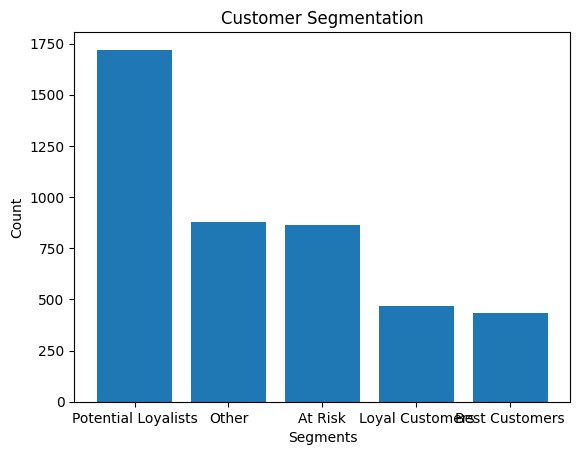

In [75]:
# Calculate segment counts
segment_counts = rfm["segment"].value_counts()

# Plot the counts
plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel("Segments")
plt.ylabel("Count")
plt.title("Customer Segmentation")
plt.show()

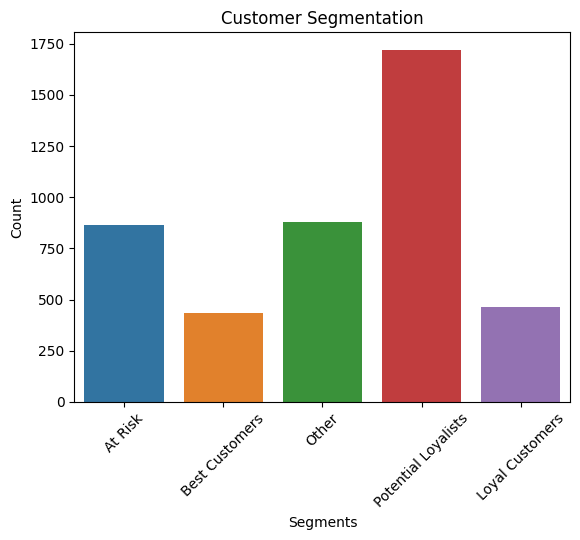

In [76]:

# Calculate segment counts
segment_counts = rfm["segment"].value_counts()

# Plot the counts
sns.countplot(data=rfm, x="segment")
plt.xlabel("Segments")
plt.ylabel("Count")
plt.title("Customer Segmentation")
plt.xticks(rotation=45)
plt.show()

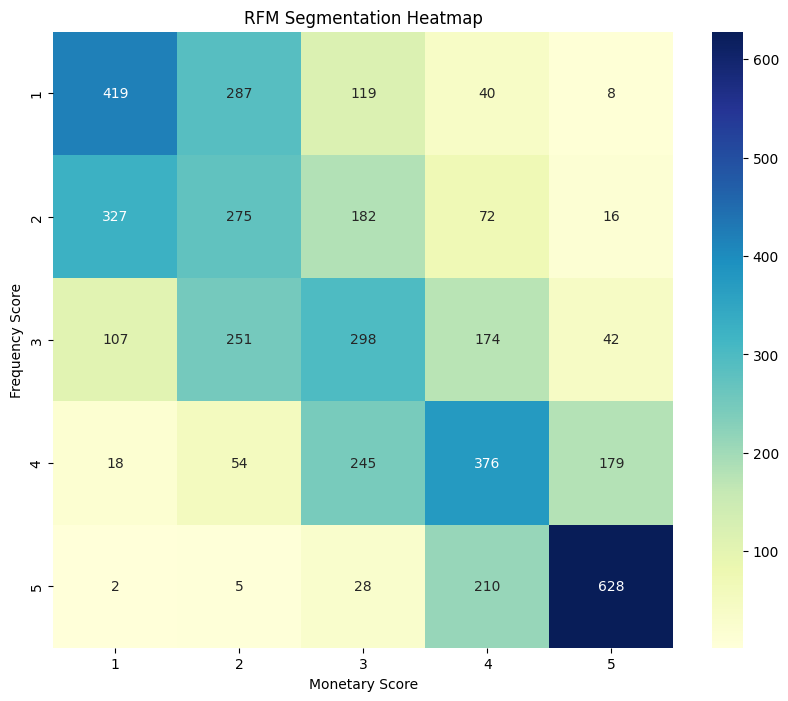

In [77]:

# Calculate RFM scores for each customer
rfm["R_score"] = pd.qcut(rfm["R"], 5, labels=[5, 4, 3, 2, 1])
rfm["F_score"] = pd.qcut(rfm["F"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["M_score"] = pd.qcut(rfm["M"], 5, labels=[1, 2, 3, 4, 5])

# Create a pivot table to aggregate the RFM scores
rfm_pivot = pd.pivot_table(rfm, values='R_score', index='F_score', columns='M_score', aggfunc='count', fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(rfm_pivot, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('RFM Segmentation Heatmap')
plt.xlabel('Monetary Score')
plt.ylabel('Frequency Score')
plt.show()

# Part 5. Load Data locally


In [79]:
segment_counts.to_csv('C:/Users/maiba/Desktop/Projects GitHub/Customer_Segmentation/Data.csv')

In [84]:
final_ot.to_csv('C:/Users/maiba/Desktop/Projects GitHub/Customer_Segmentation/Data3.csv')

In [82]:
rfm_paid.to_csv('C:/Users/maiba/Desktop/Projects GitHub/Customer_Segmentation/Data2.csv')

# Part 6. Conclusions and Results

The customer segmentation analysis using the RFM method has revealed distinct customer segments that provide valuable insights into customer behavior and preferences. Based on the analysis, the following segments have been identified:

   - Best Customers:
    Segment ID: 55
    This segment represents the highest-value customers who have demonstrated recent purchases, frequent interactions, and significant contributions to the business's revenue. Best Customers are crucial for the company's success and should be prioritized with personalized offers and outstanding service.

   - Loyal Customers:
    Segment IDs: 54, 53, 52, 51
    Loyal Customers are valued customers who have shown consistent engagement, frequent purchases, and a strong monetary value. They exhibit a high level of loyalty and should be nurtured to maintain their continued support.

   - Potential Loyalists:
    Segment IDs: 45, 44, 43, 42, 41, 35, 34, 33, 32, 31
    This segment consists of customers who exhibit potential for becoming loyal customers. They may have shown moderate recency, frequency, and monetary values. By implementing targeted marketing efforts and incentives, businesses can work towards converting them into loyal, high-value customers.

   - At Risk:
    Segment IDs: 15, 14, 13, 12, 11
    Customers in this segment are at risk of churning as their purchasing activity has declined. Proactive measures such as personalized offers, re-engagement campaigns, and improved customer service can help mitigate the risk and retain their loyalty.

   - Removed Customers:
    Segment ID: 00
    This segment represents customers who have been removed from the analysis, possibly due to factors such as cancellations, inactive accounts, or incomplete data. While they are not currently contributing to the business, understanding this segment can provide insights into customer attrition and the need to improve customer retention strategies.

By leveraging the insights gained from these customer segments, businesses can tailor their marketing strategies, allocate resources effectively, and build strong, long-term customer relationships. Understanding and catering to the specific needs of each segment can drive growth, customer satisfaction, and overall business success.